In [2]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

# P1. Filtering raw DataFrame

In [2]:
raw_df = pd.read_csv("../data/epitope_table_test1.csv")
raw_df

,Epitope ID - IEDB IRI,Epitope - Object Type,Epitope - Name,Epitope - Modified Residue(s),Epitope - Modifications,Epitope - Starting Position,Epitope - Ending Position,Epitope - IRI,Epitope - Synonyms,Epitope - Source Molecule,...,Related Object - IRI,Related Object - Synonyms,Related Object - Source Molecule,Related Object - Source Molecule IRI,Related Object - Molecule Parent,Related Object - Molecule Parent IRI,Related Object - Source Organism,Related Object - Source Organism IRI,Related Object - Species,Related Object - Species IRI
0,https://www.iedb.org/epitope/234,Linear peptide,AAISDYDYY,NaN,NaN,4840.0,4848.0,NaN,NaN,orf1ab polyprotein [Severe acute respiratory s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.iedb.org/epitope/956,Linear peptide,AEGSRGGSQA,NaN,NaN,173.0,182.0,NaN,NaN,nucleocapsid phosphoprotein [Severe acute resp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.iedb.org/epitope/1005,Linear peptide,AEIVDTVSAL,NaN,NaN,5770.0,5779.0,NaN,NaN,orf1ab polyprotein [Severe acute respiratory s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.iedb.org/epitope/1220,Linear peptide,AEVQIDRLI,NaN,NaN,989.0,997.0,NaN,NaN,Spike glycoprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.iedb.org/epitope/1349,Linear peptide,AFLLFLVLI,NaN,NaN,15.0,23.0,NaN,NaN,ORF7b protein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,https://www.iedb.org/epitope/2235314,Linear peptide,QLTPTWRVY + PYRE(Q1),Q1,Pyrrolidone carboxylic acid|PYRE,628.0,636.0,NaN,NaN,Spike glycoprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2279,https://www.iedb.org/epitope/2243241,Linear peptide,IAWNSNNL,NaN,NaN,434.0,441.0,NaN,NaN,Spike glycoprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2280,https://www.iedb.org/epitope/2243313,Linear peptide,QTYVTQQL,NaN,NaN,1005.0,1012.0,NaN,NaN,Spike glycoprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2281,https://www.iedb.org/epitope/2243365,Linear peptide,VGYQPYRV,NaN,NaN,503.0,510.0,NaN,NaN,Spike glycoprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Columns I want to keep
columns_to_keep = [
    'Epitope ID - IEDB IRI',
    'Epitope - Name',
    'Epitope - Source Molecule'
]

# Create a new DataFrame with only the desired columns
filtered_df = raw_df[columns_to_keep]

filtered_df

,Epitope ID - IEDB IRI,Epitope - Name,Epitope - Source Molecule
0,https://www.iedb.org/epitope/234,AAISDYDYY,orf1ab polyprotein [Severe acute respiratory s...
1,https://www.iedb.org/epitope/956,AEGSRGGSQA,nucleocapsid phosphoprotein [Severe acute resp...
2,https://www.iedb.org/epitope/1005,AEIVDTVSAL,orf1ab polyprotein [Severe acute respiratory s...
3,https://www.iedb.org/epitope/1220,AEVQIDRLI,Spike glycoprotein
4,https://www.iedb.org/epitope/1349,AFLLFLVLI,ORF7b protein
...,...,...,...
2278,https://www.iedb.org/epitope/2235314,QLTPTWRVY + PYRE(Q1),Spike glycoprotein
2279,https://www.iedb.org/epitope/2243241,IAWNSNNL,Spike glycoprotein
2280,https://www.iedb.org/epitope/2243313,QTYVTQQL,Spike glycoprotein
2281,https://www.iedb.org/epitope/2243365,VGYQPYRV,Spike glycoprotein


In [12]:
for e in filtered_df['Related Object - Source Organism']:
    print(e) # nothing here # remove column

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [4]:
for e in filtered_df['Epitope - Source Molecule']:
    print(e) # nothing here # remove column

orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
nucleocapsid phosphoprotein [Severe acute respiratory syndrome coronavirus 2]
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
Spike glycoprotein
ORF7b protein
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
Replicase polyprotein 1ab
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
Nucleoprotein
nucleocapsid phosphoprotein [Severe acute respiratory syndrome coronavirus 2]
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
Replicase polyprotein 1ab
Spike glycoprotein
Nucleoprotein
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
replicase polyprotein 1ab
orf1ab polyprotein [Severe acute respiratory syndrome coronavirus 2]
Replicase polyprotein 1ab
orf1ab polyprotein [Severe acute respir

# P1. Function to extract html text

In [19]:
i = 0
for link in filtered_df['Epitope ID - IEDB IRI']:
    i += 1
    print(link)
    if i == 2:
        break
    # else:
    #     print(link)
    # print(link)

https://www.iedb.org/epitope/234
https://www.iedb.org/epitope/956


In [23]:
links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    r = requests.get(url = link)
    
    if r.status_code != 200:
        r.raise_for_status()
    # print the html
    print(r.text)


<!DOCTYPE html> <!-- doc type needed by ie8 for position absolute -->
<html lang="en"><head>

<title>AAISDYDYY epitope - Immune Epitope Database (IEDB)</title>

<!-- General meta tags -->
<meta name="description" content="Free resource for searching and exporting immune epitopes. Includes more than 95% of all published infectious disease, allergy, autoimmune, and transplant epitope data.">
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta name="robots" content="index, follow"> 

<!-- OpenGraph meta tags (Facebook) -->
<meta property="og:title" content="AAISDYDYY epitope - Immune Epitope Database (IEDB)">
<meta property="og:description" content="Free resource for searching and exporting immune epitopes. Includes more than 95% of all published infectious disease, allergy, autoimmune, and transplant epitope data.">
<meta property="og:image" content="http://www.iedb.org/images/IEDB.png">
<meta property="og:url" content="http://www.iedb.org">
<meta property="og:type

In [24]:
def extract_html(url):
    r = requests.get(url)
    if r.status_code != 200:
        r.raise_for_status()
    return r.text

In [25]:
links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    print(html)


<!DOCTYPE html> <!-- doc type needed by ie8 for position absolute -->
<html lang="en"><head>

<title>AAISDYDYY epitope - Immune Epitope Database (IEDB)</title>

<!-- General meta tags -->
<meta name="description" content="Free resource for searching and exporting immune epitopes. Includes more than 95% of all published infectious disease, allergy, autoimmune, and transplant epitope data.">
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta name="robots" content="index, follow"> 

<!-- OpenGraph meta tags (Facebook) -->
<meta property="og:title" content="AAISDYDYY epitope - Immune Epitope Database (IEDB)">
<meta property="og:description" content="Free resource for searching and exporting immune epitopes. Includes more than 95% of all published infectious disease, allergy, autoimmune, and transplant epitope data.">
<meta property="og:image" content="http://www.iedb.org/images/IEDB.png">
<meta property="og:url" content="http://www.iedb.org">
<meta property="og:type

# P2. Function to parse the html

In [44]:
links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    # print(html)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    script_text = soup.find('script', type='text/javascript').string
    # Use regular expressions to find the JSON-like data
    epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script_text)
    compiled_data_match = re.search(r'var compiledData = (.*?});', script_text)

    # Convert the matched string to valid JSON
    epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
    compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))

    # Now you have the data in a dictionary form, you can easily put it into a pandas DataFrame
    epitope_df = pd.json_normalize(epitope_data_json[0][0]['children'])
    compiled_df = pd.json_normalize(compiled_data_json['data'])

    # Optional: Concatenate or merge both DataFrames if needed
    final_df = pd.concat([epitope_df, compiled_df], axis=1)

    print(epitope_df)

TypeError: expected string or bytes-like object

# P3. Extracting epitope, organism and antigen data

In [31]:
import re
import json
from pprint import pprint
import pandas as pd
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    epitope_data = []
    # Dictionary variables
    epitope_dict = {}
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from epitope, organism and antigen
            epitope_data_match = re.search(r'var refernceEpitopeData = (.*?});', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            
            if epitope_data_match and compiled_data_match:
                
                # 1. epitope_data_match
                # All the text
                # print(epitope_data_match.group(0))
                # print()
                
                # Only the captured group
                print(json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString'])
                print("Extracted data:")
                epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
                epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
                epitope = epitope_match.group(1)
                print(f"Epitope: {epitope}")
                antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
                antigen = antigen_match.group(1)
                print(f"Antigen: {antigen}")
                organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                organism = organism_match.group(1)
                # organism_match = re.search(r'.*studied as part of .* from (.*?) .*', epitope_data_string)
                print(f"Organism: {organism}")
                # organism_match = re.findall(rf'.*{antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                # print(organism_match)
                epitope_triple_tuple = (organism, antigen, epitope)
                epitope_data.append(epitope_triple_tuple)
                break
                # Convert the matched string to valid JSON
    
    print(epitope_data)
    
    # Adding epitope data to dictionary
    # listing each element of the tuple elements of the epitope data list
    for organism, antigen, epitope in epitope_data:
        if "Organism" not in epitope_dict:
            epitope_dict["Organism"] = organism
        if "Antigen" not in epitope_dict:
            epitope_dict["Antigen"] = antigen
        if "Epitope" not in epitope_dict:
            epitope_dict["Epitope"] = epitope
    pprint(epitope_dict)
    
    print()

AAISDYDYY is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Replicase polyprotein 1ab from SARS-CoV1 and Replicase polyprotein 1ab from SARS-CoV2.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assay and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AAISDYDYY
Antigen: Replicase polyprotein 1ab
Organism: SARS-CoV1
[('SARS-CoV1', 'Replicase polyprotein 1ab', 'AAISDYDYY')]
{'Antigen': 'Replicase polyprotein 1ab',
 'Epitope': 'AAISDYDYY',
 'Organism': 'SARS-CoV1'}

AEGSRGGSQA is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Nucleoprotein from SARS-CoV2 and Nucleoprotein from SARS-CoV1.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assays and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AEGSRGGSQA
Antigen: Nucleoprotein
Organism: SA

In [3]:
import re
import json
from pprint import pprint
import pandas as pd
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    epitope_data = []
    # Dictionary variables
    epitope_dict = {}
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from epitope, organism and antigen
            epitope_data_match = re.search(r'var refernceEpitopeData = (.*?});', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            
            if epitope_data_match and compiled_data_match:
                
                # 1. epitope_data_match
                # All the text
                # print(epitope_data_match.group(0))
                # print()
                
                # Only the captured group
                print(json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString'])
                print("Extracted data:")
                epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
                epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
                epitope = epitope_match.group(1)
                print(f"Epitope: {epitope}")
                antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
                antigen = antigen_match.group(1)
                print(f"Antigen: {antigen}")
                organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                organism = organism_match.group(1)
                # organism_match = re.search(r'.*studied as part of .* from (.*?) .*', epitope_data_string)
                print(f"Organism: {organism}")
                # organism_match = re.findall(rf'.*{antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                # print(organism_match)
                epitope_triple_tuple = (organism, antigen, epitope)
                epitope_data.append(epitope_triple_tuple)
                break
                # Convert the matched string to valid JSON
    
    print(epitope_data)
    
    # Adding epitope data to dictionary
    # listing each element of the tuple elements of the epitope data list
    for organism, antigen, epitope in epitope_data:
        epitope_dict = {"Organism": organism, "Antigen": antigen, "Epitope": epitope}
        pprint(epitope_dict)
    
    print()

AAISDYDYY is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Replicase polyprotein 1ab from SARS-CoV1 and Replicase polyprotein 1ab from SARS-CoV2.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assay and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AAISDYDYY
Antigen: Replicase polyprotein 1ab
Organism: SARS-CoV1
[('SARS-CoV1', 'Replicase polyprotein 1ab', 'AAISDYDYY')]
{'Antigen': 'Replicase polyprotein 1ab',
 'Epitope': 'AAISDYDYY',
 'Organism': 'SARS-CoV1'}

AEGSRGGSQA is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Nucleoprotein from SARS-CoV2 and Nucleoprotein from SARS-CoV1.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assays and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AEGSRGGSQA
Antigen: Nucleoprotein
Organism: SA

In [4]:
import sys
print(sys.version)

3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:58:50) 
[GCC 10.3.0]


## P3.5. Using `OrderedDict` from `collections`

In [5]:
import re
import json
from pprint import pprint
import pandas as pd
from collections import OrderedDict
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    epitope_data = []
    # Dictionary variables
    epitope_dict = {}
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from epitope, organism and antigen
            epitope_data_match = re.search(r'var refernceEpitopeData = (.*?});', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            
            if epitope_data_match and compiled_data_match:
                
                # 1. epitope_data_match
                # All the text
                # print(epitope_data_match.group(0))
                # print()
                
                # Only the captured group
                # print(json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString'])
                # print("Extracted data:")
                epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
                epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
                epitope = epitope_match.group(1)
                # print(f"Epitope: {epitope}")
                antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
                antigen = antigen_match.group(1)
                # print(f"Antigen: {antigen}")
                organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                organism = organism_match.group(1)
                # organism_match = re.search(r'.*studied as part of .* from (.*?) .*', epitope_data_string)
                # print(f"Organism: {organism}")
                # organism_match = re.findall(rf'.*{antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                # print(organism_match)
                epitope_triple_tuple = (organism, antigen, epitope)
                epitope_data.append(epitope_triple_tuple)
                break
                # Convert the matched string to valid JSON
    
    print(epitope_data)
    
    # Adding epitope data to dictionary
    # listing each element of the tuple elements of the epitope data list
    for organism, antigen, epitope in epitope_data:
        epitope_dict = OrderedDict([("Organism", organism), ("Antigen", antigen), ("Epitope", epitope)])
    pprint(epitope_dict)
    
    print()

AAISDYDYY is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Replicase polyprotein 1ab from SARS-CoV1 and Replicase polyprotein 1ab from SARS-CoV2.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assay and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AAISDYDYY
Antigen: Replicase polyprotein 1ab
Organism: SARS-CoV1
[('SARS-CoV1', 'Replicase polyprotein 1ab', 'AAISDYDYY')]
OrderedDict([('Organism', 'SARS-CoV1'),
             ('Antigen', 'Replicase polyprotein 1ab'),
             ('Epitope', 'AAISDYDYY')])

AEGSRGGSQA is a linear peptidic epitope (epitope ID <iedb_link_epitope>) studied as part of Nucleoprotein from SARS-CoV2 and Nucleoprotein from SARS-CoV1.  This epitope has been studied for immune reactivity in <iedb_link_reference> publication(s), tested in <iedb_link_tcell> T cell assays and <iedb_link_ligand> MHC ligand assays.
Extracted data:
Epitope: AEG

If you place `epitope_dict = OrderedDict()` inside the loop that iterates over `links`, but outside the inner loop that iterates over `scripts`, you will indeed create a new `OrderedDict` for each link. This is the correct placement if your goal is to have a separate dictionary for each link. Your revised script is structured correctly for this purpose.

Here's the breakdown of the logic:

1. **Initialize `epitope_dict` for Each Link**: For every link in the `links` list, the script sets `epitope_dict = OrderedDict()`. This means that for each link, a fresh, empty `OrderedDict` is created. 

2. **Extract Data and Populate `epitope_dict`**: The script then parses the HTML content of each link, extracts the necessary data, and populates `epitope_dict` with this data.

3. **Append Each `epitope_dict` to `ordered_dicts`**: After processing each link (and its associated HTML content), the populated `epitope_dict` is appended to the `ordered_dicts` list. This results in `ordered_dicts` containing one `OrderedDict` for each link, each holding the data extracted from that particular link.

4. **Create DataFrame from `ordered_dicts`**: Finally, a DataFrame is created from the `ordered_dicts` list, which now contains an `OrderedDict` for each link.

Your script is set up to process each link individually, creating and populating a separate `OrderedDict` for each. This ensures that the data from each link is kept distinct and organized as per the order of insertion in each `OrderedDict`. After processing all links, the `ordered_dicts` list holds all the dictionaries, ready to be converted into a pandas DataFrame.

This structure of your script is appropriate for the goal you described, and placing `epitope_dict = OrderedDict()` inside the outer loop (iterating over `links`) but outside the inner loop (iterating over `scripts`) is the correct approach.

In [ ]:
import re
import json
from pprint import pprint
import pandas as pd
from collections import OrderedDict
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    epitope_data = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from epitope, organism and antigen
            epitope_data_match = re.search(r'var refernceEpitopeData = (.*?});', script.string)
            # compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            # if epitope_data_match and compiled_data_match:
            if epitope_data_match:
                
                # 1. Get epitope data and Convert the matched strings to valid JSONs
                epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
                epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
                antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
                organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                # If there is a match for each:
                if epitope_match and antigen_match and organism_match:
                    epitope_triple_tuple = (organism_match.group(1), antigen_match.group(1), epitope_match.group(1))
                    epitope_data.append(epitope_triple_tuple)
                    break
                else:
                    print("There was not match for epitope, antigen or organism")
    
    # Adding epitope data to dictionary
    # listing each element of the tuple elements of the epitope data list
    for organism, antigen, epitope in epitope_data:
    # for organism, antigen, epitope in epitope_triple_tuple:
        epitope_dict["Organism"] = organism
        epitope_dict["Antigen"] = antigen
        epitope_dict["Epitope"] = epitope
    
    # pprint(epitope_dict)
    ordered_dicts.append(epitope_dict)
    print()

pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df



[OrderedDict([('Organism', 'SARS-CoV1'),
              ('Antigen', 'Replicase polyprotein 1ab'),
              ('Epitope', 'AAISDYDYY')]),
 OrderedDict([('Organism', 'SARS-CoV2'),
              ('Antigen', 'Nucleoprotein'),
              ('Epitope', 'AEGSRGGSQA')])]


,Organism,Antigen,Epitope
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA


In [10]:
import re
import json
from pprint import pprint
import pandas as pd
from collections import OrderedDict
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # epitope_data = [] # not necessary anymore
    # Dictionary variables
    epitope_dict = OrderedDict()
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from epitope, organism and antigen
            epitope_data_match = re.search(r'var refernceEpitopeData = (.*?});', script.string)
            # compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            #if epitope_data_match and compiled_data_match:
            if epitope_data_match:
                
                # 1. Get epitope data and Convert the matched strings to valid JSONs
                epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
                epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
                antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
                organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
                # If there is a match for each:
                if epitope_match and antigen_match and organism_match:
                    epitope_triple_tuple = (organism_match.group(1), antigen_match.group(1), epitope_match.group(1))
                    # epitope_data.append(epitope_triple_tuple)
                    break
                else:
                    print("There was not match for epitope, antigen or organism")
    
    # Adding epitope data to dictionary
    epitope_dict["Organism"] = epitope_triple_tuple[0]
    epitope_dict["Antigen"] = epitope_triple_tuple[1]
    epitope_dict["Epitope"] = epitope_triple_tuple[2]
    
    # pprint(epitope_dict)
    ordered_dicts.append(epitope_dict)
    print()

pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df



[OrderedDict([('Organism', 'SARS-CoV1'),
              ('Antigen', 'Replicase polyprotein 1ab'),
              ('Epitope', 'AAISDYDYY')]),
 OrderedDict([('Organism', 'SARS-CoV2'),
              ('Antigen', 'Nucleoprotein'),
              ('Epitope', 'AEGSRGGSQA')])]


,Organism,Antigen,Epitope
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA


## P.3.6. Function to get epitope data

In [12]:
def get_epitope_data(pattern, string):
    # Using regular expressions to find the JSON-like data
    epitope_data_match = re.search(pattern, string)
    # If there is no match
    if not epitope_data_match:
        raise ValueError("There was no match for epitope data in the HTML")
    # Get epitope data and Convert the matched strings to valid JSONs
    epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
    epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
    antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
    organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
    # If there is not a match for the tree of them:
    if not (epitope_match and antigen_match and organism_match):
        raise ValueError("There was not a match for epitope, antigen, or organism")
    # If there was a match for the tree elements, return them as a tuple
    return organism_match.group(1), antigen_match.group(1), epitope_match.group(1)

In [1]:
def get_epitope_data(pattern, string):
    # Using regular expressions to find the JSON-like data
    epitope_data_match = re.search(pattern, string)
    # If there is no match
    if not epitope_data_match:
        raise ValueError("There was no match for epitope data in the HTML")
    # Get epitope data and Convert the matched strings to valid JSONs
    epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
    epitope_match = re.search(r'(^[A-Z]+(?: \+ [A-Z]+\([A-Z0-9]+\))?)\s.*', epitope_data_string)
    antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
    organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
    # If there is not a match for the tree of them:
    if not (epitope_match and antigen_match and organism_match):
        raise ValueError("There was not a match for epitope, antigen, or organism")
    # If there was a match for the tree elements, return them as a tuple
    return organism_match.group(1), antigen_match.group(1), epitope_match.group(1)

In [ ]:
def get_epitope_data(pattern, string):
    # Using regular expressions to find the JSON-like data
    epitope_data_match = re.search(pattern, string)
    # If there is no match
    if not epitope_data_match:
        raise ValueError("There was no match for epitope data in the HTML")
    # Get epitope data and Convert the matched strings to valid JSONs
    epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
    epitope_match = re.search(r'(^[A-Z]+(?: \+ [A-Z]+\([A-Z0-9]+\))?)\s.*', epitope_data_string)
    antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
    organism_match = re.search(r'.*from (.*?)(?:\.|$)', epitope_data_string)
    # If there is not a match for the tree of them:
    if not (epitope_match and antigen_match and organism_match):
        raise ValueError("There was not a match for epitope, antigen, or organism")
    # If there was a match for the tree elements, return them as a tuple
    return organism_match.group(1), antigen_match.group(1), epitope_match.group(1)

To capture the characters after the last occurrence of "from" and before a literal dot, you can modify the regular expression to be more specific. One way to do this is to use a greedy match to find the last occurrence of "from" and then capture the subsequent characters until a literal dot.

Here's how you can modify the regular expression:

```python
organism_match = re.search(r".*from (.*?)(?:\.|$)", epitope_data_string)
```

Explanation:
- `.*from`: This part uses a greedy match (`.*`) to find the last occurrence of "from". The `.*` consumes as much of the string as possible before encountering the final "from".
- `(.*?)`: This non-greedy match captures everything after the last "from" until it encounters the next part of the expression.
- `(?:\.)`: This is a non-capturing group for a literal dot. The non-capturing group is used here because we want to match the dot but don’t want to include it in our captured group.
- `|`: This represents an alternation, essentially saying to match either the pattern before it (the dot) or the end of the string.
- `$`: This represents the end of the string. It allows the regular expression to match up to the end if there is no dot.

With this regular expression, in both of your examples, "SARS-CoV2" should be correctly captured. The greedy part ensures that it's capturing the content after the last "from" before a dot or the end of the string.

In [27]:
import re
import json
from pprint import pprint
import pandas as pd
from collections import OrderedDict
from bs4 import BeautifulSoup
import requests

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    print(f"Length of scripts: {len(scripts)}") # 65, but not all have a string
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # epitope_data = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    
    for script in scripts:
        # Making sure that the script tag contains a string
        if script.string:
            # Part 1: Get epitope data (organism, antigen, epitope)
            try:
                epitope_triple_tuple = get_epitope_data(r'var refernceEpitopeData = (.*?});', script.string)
                print(epitope_triple_tuple)
                print()
            except ValueError as e:
                print(f"> A ValueError occurred: {e}")
            except Exception as e:
                print(f"> An unexpected error occurred: {e}")
    # Adding epitope data to dictionary
    epitope_dict["Organism"] = epitope_triple_tuple[0]
    epitope_dict["Antigen"] = epitope_triple_tuple[1]
    epitope_dict["Epitope"] = epitope_triple_tuple[2]
    
    # appending dictionary with information from this html to list of dictionaries
    ordered_dicts.append(epitope_dict)

pprint(ordered_dicts)

Length of scripts: 65
> A ValueError occurred: There was no match for epitope data in the HTML
> A ValueError occurred: There was no match for epitope data in the HTML
('SARS-CoV1', 'Replicase polyprotein 1ab', 'AAISDYDYY')

Length of scripts: 65
> A ValueError occurred: There was no match for epitope data in the HTML
> A ValueError occurred: There was no match for epitope data in the HTML
('SARS-CoV2', 'Nucleoprotein', 'AEGSRGGSQA')

Length of scripts: 65
> A ValueError occurred: There was no match for epitope data in the HTML
> A ValueError occurred: There was no match for epitope data in the HTML
('SARS-CoV2.', 'Spike glycoprotein', 'VLYENQKL')

[OrderedDict([('Organism', 'SARS-CoV1'),
              ('Antigen', 'Replicase polyprotein 1ab'),
              ('Epitope', 'AAISDYDYY')]),
 OrderedDict([('Organism', 'SARS-CoV2'),
              ('Antigen', 'Nucleoprotein'),
              ('Epitope', 'AEGSRGGSQA')]),
 OrderedDict([('Organism', 'SARS-CoV2.'),
              ('Antigen', 'Spike g

## P.3.7. The data I want seems to be always on the last script.

In [26]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    print(f"Length of scripts: {len(scripts)}") # 65, but not all have a string
    # List variables
    mhc_positives = []
    mhc_negatives = []
    epitope_data = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    print(scripts[-1].string)
    print()

Length of scripts: 65

function run()
{
	var resultData = [[{"header":"Distinct Epitope","children":[{"key":"Epitope ID","value":"234","link":"234","type":"epitope_id"},{"key":"Linear Sequence","value":"AAISDYDYY"},{"key":"Source Organism","value":"SARS coronavirus Tor2 (Severe acute respiratory syndrome-related coronavirus Tor2)"},{"key":"Source Antigen","value":"Replicase polyprotein 1ab"}]}]];
	var dataObjectMap = {}	
	var detailsData = {"header":"Related Information","children":[{"key":"References","value":"2"},{"key":"Bcell Assays","value":"0"},{"key":"Tcell Assays","value":"1"},{"key":"MHC Ligand Assays","value":"5"}]};
	var linksData = {"data":[{"icon_url":"\/images\/IEDB-AR_Lnkout_Icon_v5.png","resource_text":"IEDB-AR: MHC-I Processing","target_text":"Predict MHC class I processing","resource":"http:\/\/tools.iedb.org\/processing\/","target":"http:\/\/tools.iedb.org\/processing\/?seq=%3EIEDB%20Epitope%20234%0AAAISDYDYY","tool":true},{"icon_url":"\/images\/IEDB-AR_Lnkout_Icon_v5

## P.3.8. Updating script to not raise `ValueError`s for all the `script` tags in which the data is not found using a `flag`

In [1]:
def get_epitope_data(pattern, string):
    # Using regular expressions to find the JSON-like data
    epitope_data_match = re.search(pattern, string)
    # If there is no match
    if not epitope_data_match:
        raise ValueError("There was no match for epitope data in the HTML")
    # Get epitope data and Convert the matched strings to valid JSONs
    epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']
    epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
    antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
    organism_match = re.search(rf'.*studied as part of {antigen_match.group(1)} from (.*?) .*', epitope_data_string)
    # If there is not a match for the tree of them:
    if not (epitope_match and antigen_match and organism_match):
        raise ValueError("There was not a match for epitope, antigen, or organism")
    # If there was a match for the tree elements, return them as a tuple
    return organism_match.group(1), antigen_match.group(1), epitope_match.group(1)

In [14]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    # Flags
    data_extracted = False  # Flag to indicate successful data extraction
    
    for script in scripts:
        # Making sure that the script tag contains a string
        # and also contains the strings with the data I want
        if script.string and "refernceEpitopeData" in script.string and "compiledData" in script.string:
            # Part 1: Get epitope data (organism, antigen, epitope)
            try:
                epitope_triple_tuple = get_epitope_data(r'var refernceEpitopeData = (.*?});', script.string)
                data_extracted = True
                print()
                break # out of the loop, data was found, do not keep iterating over other scripts anymore
            except ValueError as e:
                # Handle the ValueError but continue the loop
                print(f"> A ValueError occurred: {e}")
            except Exception as e:
                # Handle the Error but continue the loop
                print(f"> An unexpected error occurred: {e}")
    
    if not data_extracted:
        print(f"No data extracted from the link: {link}")
    
    if data_extracted:
        # Adding epitope data to dictionary
        epitope_dict["Organism"] = epitope_triple_tuple[0]
        epitope_dict["Antigen"] = epitope_triple_tuple[1]
        epitope_dict["Epitope"] = epitope_triple_tuple[2]
        
    # Appending dictionary with information from this html to list of dictionaries
    ordered_dicts.append(epitope_dict)
    
pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df




[OrderedDict([('Organism', 'SARS-CoV1'),
              ('Antigen', 'Replicase polyprotein 1ab'),
              ('Epitope', 'AAISDYDYY')]),
 OrderedDict([('Organism', 'SARS-CoV2'),
              ('Antigen', 'Nucleoprotein'),
              ('Epitope', 'AEGSRGGSQA')]),
 OrderedDict([('Organism', 'SARS-CoV2.'),
              ('Antigen', 'Spike glycoprotein'),
              ('Epitope', 'VLYENQKL')])]


,Organism,Antigen,Epitope
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA
2,SARS-CoV2.,Spike glycoprotein,VLYENQKL


## P.3.9. Possible function that returns `Not found` when an element is missing in the html text

To modify the `get_epitope_data` function to return `"Not found"` for any component (organism, antigen, epitope) that `re.search` doesn't find a match for, you can adjust the function to check the result of each `re.search` call individually. If a match is not found, you can set the corresponding variable to `"Not found"`.

Here's the modified version of your function:

```python
def get_epitope_data(pattern, string):
    # Using regular expressions to find the JSON-like data
    epitope_data_match = re.search(pattern, string)
    if not epitope_data_match:
        return "Not found", "Not found", "Not found"  # Return "Not found" for all if no pattern match

    epitope_data_string = json.loads(epitope_data_match.group(1))['data']['referenceEpitopeString']

    # Perform individual searches and set to "Not found" if no match is found
    epitope_match = re.search(r'(^[A-Z]*)\s.*', epitope_data_string)
    epitope = epitope_match.group(1) if epitope_match else "Not found"

    antigen_match = re.search(r'.*studied as part of (.*?) from .*', epitope_data_string)
    antigen = antigen_match.group(1) if antigen_match else "Not found"

    organism_match = re.search(rf'.*studied as part of {antigen} from (.*?) .*', epitope_data_string)
    organism = organism_match.group(1) if organism_match else "Not found"

    return organism, antigen, epitope

# Example usage
pattern = r'var refernceEpitopeData = (.*?});'
string = # Your HTML string here

result = get_epitope_data(pattern, string)
print(result)
```

In this version, for each component (epitope, antigen, organism), the function checks if the `re.search` call found a match. If it did, it uses the matched value; if not, it sets the variable to `"Not found"`. The function then returns a tuple of these three values.

This approach ensures that you get a tuple with either the found values or `"Not found"` for each element, providing a clear indication of which components were successfully matched and which were not.

# P4. Extracting MHC allele data

In [4]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            # refernceEpitopeData # data from organism and antigen
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                print(compiled_data_json)
                # print(compiled_data_json['data'][0]['data'])
                print()

{'header': 'COMPILED DATA', 'data': [{'headers': {'main': 'MHC Ligand Assay(s)', 'left': 'MHC molecule', 'right': 'Positive / All'}, 'type': 'mhc_ligand', 'data': [{'mhc_allele_id': '211', 'mhc_molecule': 'HLA-A*03:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '213', 'mhc_molecule': 'HLA-A*11:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '230', 'mhc_molecule': 'HLA-A*68:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '225', 'mhc_molecule': 'HLA-A*31:01', 'positive_count': '0', 'total_count': '1'}, {'mhc_allele_id': '226', 'mhc_molecule': 'HLA-A*33:01', 'positive_count': '0', 'total_count': '1'}]}, {'headers': {'main': 'B Cell Assay(s)', 'left': 'Assay Type', 'right': 'Positive / All'}, 'type': 'bcell', 'data': []}, {'headers': {'main': 'T Cell Assay(s)', 'left': 'Assay Type', 'right': 'Positive / All'}, 'type': 'tcell', 'data': [{'assay_type': 'qualitative binding', 'positive_count': '1', 'total_count': '1'}]}]}

{'header': '

In [29]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            # refernceEpitopeData # data from organism and antigen
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                # print(compiled_data_json['data'][0]['data'])
                
                # List of dictionaries with mhc molecules in each dictionary
                mhc_list = compiled_data_json['data'][0]['data']
                print(mhc_list) # add check if the list is empty, like in the third link!
                for mhc_dict in mhc_list:
                    # print(mhc_dict)
                    # print(mhc_dict['mhc_molecule'])
                    # print(mhc_dict['positive_count'])
                    mhc_molecule = mhc_dict['mhc_molecule']
                    positive_count = int(mhc_dict['positive_count'])
                    mhc_tuple = (mhc_molecule, positive_count)
                    print(mhc_tuple)
                print()
                break

[{'mhc_allele_id': '211', 'mhc_molecule': 'HLA-A*03:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '213', 'mhc_molecule': 'HLA-A*11:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '230', 'mhc_molecule': 'HLA-A*68:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '225', 'mhc_molecule': 'HLA-A*31:01', 'positive_count': '0', 'total_count': '1'}, {'mhc_allele_id': '226', 'mhc_molecule': 'HLA-A*33:01', 'positive_count': '0', 'total_count': '1'}]
('HLA-A*03:01', 1)
('HLA-A*11:01', 1)
('HLA-A*68:01', 1)
('HLA-A*31:01', 0)
('HLA-A*33:01', 0)

[{'mhc_allele_id': '36', 'mhc_molecule': 'HLA-B*45:01', 'positive_count': '1', 'total_count': '1'}, {'mhc_allele_id': '185', 'mhc_molecule': 'HLA-B*18:01', 'positive_count': '0', 'total_count': '1'}, {'mhc_allele_id': '28', 'mhc_molecule': 'HLA-B*40:01', 'positive_count': '0', 'total_count': '1'}, {'mhc_allele_id': '29', 'mhc_molecule': 'HLA-B*40:02', 'positive_count': '0', 'total_count': '1'}, {'mhc

In [9]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from organism and antigen
            # 2. compiled_data_match
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                # print(compiled_data_json['data'][0]['data'])
                
                # List of dictionaries with mhc molecules in each dictionary
                mhc_list = compiled_data_json['data'][0]['data']
                # add check if the list is empty, like in the third link!
                for mhc_dict in mhc_list:
                    # print(mhc_dict)
                    # print(mhc_dict['mhc_molecule'])
                    # print(mhc_dict['positive_count'])
                    mhc_molecule = mhc_dict['mhc_molecule']
                    positive_count = int(mhc_dict['positive_count'])
                    mhc_tuple = (mhc_molecule, positive_count)
                    # print(mhc_tuple)
                    # Classifying MHC molecules
                    if positive_count > 0:
                        mhc_positives.append(mhc_molecule)
                    else:
                        mhc_negatives.append(mhc_molecule)

    # print(f"Positives: {mhc_positives}")
    # print(f"Negatives: {mhc_negatives}")
    epitope_dict = {
        "Positive MHC alleles": mhc_positives,
        "Negative MHC alleles": mhc_negatives
        }
    ordered_dicts.append(epitope_dict)
    pprint(epitope_dict)
    print()

    
pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df

{'Negative MHC alleles': ['HLA-A*31:01', 'HLA-A*33:01'],
 'Positive MHC alleles': ['HLA-A*03:01', 'HLA-A*11:01', 'HLA-A*68:01']}

{'Negative MHC alleles': ['HLA-B*18:01',
                          'HLA-B*40:01',
                          'HLA-B*40:02',
                          'HLA-B*44:02',
                          'HLA-B*44:03'],
 'Positive MHC alleles': ['HLA-B*45:01']}

{'Negative MHC alleles': [], 'Positive MHC alleles': []}

[{'Negative MHC alleles': ['HLA-A*31:01', 'HLA-A*33:01'],
  'Positive MHC alleles': ['HLA-A*03:01', 'HLA-A*11:01', 'HLA-A*68:01']},
 {'Negative MHC alleles': ['HLA-B*18:01',
                           'HLA-B*40:01',
                           'HLA-B*40:02',
                           'HLA-B*44:02',
                           'HLA-B*44:03'],
  'Positive MHC alleles': ['HLA-B*45:01']},
 {'Negative MHC alleles': [], 'Positive MHC alleles': []}]


,Positive MHC alleles,Negative MHC alleles
0,"[HLA-A*03:01, HLA-A*11:01, HLA-A*68:01]","[HLA-A*31:01, HLA-A*33:01]"
1,[HLA-B*45:01],"[HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*..."
2,[],[]


In [35]:
print(mhc_positives)

[]


In [44]:
print(mhc_negatives)

['HLA-B*18:01', 'HLA-B*40:01', 'HLA-B*40:02', 'HLA-B*44:02', 'HLA-B*44:03']


In [14]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            # refernceEpitopeData # data from organism and antigen
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))

                # Now you have the data in a dictionary form, you can easily put it into a pandas DataFrame
                # epitope_df = pd.json_normalize(epitope_data_json[0][0]['children'])
                compiled_df = pd.json_normalize(compiled_data_json['data'])

                # Optional: Concatenate or merge both DataFrames if needed
                #final_df = pd.concat([epitope_df, compiled_df], axis=1)

                #print(final_df)
                print(compiled_df)
                break  # Break the loop once we've found and processed the script


         type                                               data  \
0  mhc_ligand  [{'mhc_allele_id': '211', 'mhc_molecule': 'HLA...   
1       bcell                                                 []   
2       tcell  [{'assay_type': 'qualitative binding', 'positi...   

          headers.main  headers.left   headers.right  
0  MHC Ligand Assay(s)  MHC molecule  Positive / All  
1      B Cell Assay(s)    Assay Type  Positive / All  
2      T Cell Assay(s)    Assay Type  Positive / All  
         type                                               data  \
0  mhc_ligand  [{'mhc_allele_id': '36', 'mhc_molecule': 'HLA-...   
1       bcell                                                 []   
2       tcell  [{'assay_type': 'T cell binding', 'positive_co...   

          headers.main  headers.left   headers.right  
0  MHC Ligand Assay(s)  MHC molecule  Positive / All  
1      B Cell Assay(s)    Assay Type  Positive / All  
2      T Cell Assay(s)    Assay Type  Positive / All  


## P.4.1. How to deal with htmls that don't have MHC allele data, like the third link

In [13]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # Dictionary variables
    epitope_dict = OrderedDict()
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            
            # refernceEpitopeData # data from organism and antigen
            # 2. compiled_data_match
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                # print(compiled_data_json['data'][0]['data'])
                
                # List of dictionaries with mhc molecules in each dictionary
                mhc_list = compiled_data_json['data'][0]['data']
                # add check if the list is empty, like in the third link!
                for mhc_dict in mhc_list:
                    # print(mhc_dict)
                    # print(mhc_dict['mhc_molecule'])
                    # print(mhc_dict['positive_count'])
                    mhc_molecule = mhc_dict['mhc_molecule']
                    positive_count = int(mhc_dict['positive_count'])
                    mhc_tuple = (mhc_molecule, positive_count)
                    # print(mhc_tuple)
                    # Classifying MHC molecules
                    if positive_count > 0:
                        mhc_positives.append(mhc_molecule)
                    else:
                        mhc_negatives.append(mhc_molecule)

    # print(f"Positives: {mhc_positives}")
    # print(f"Negatives: {mhc_negatives}")
    epitope_dict = {
        "Positive MHC alleles": ', '.join(mhc_positives) if mhc_positives else "No data was found",
        "Negative MHC alleles": ', '.join(mhc_negatives) if mhc_negatives else "No data was found"
        }
    ordered_dicts.append(epitope_dict)
    # pprint(epitope_dict)
    print()

    
pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df




[{'Negative MHC alleles': 'HLA-A*31:01, HLA-A*33:01',
  'Positive MHC alleles': 'HLA-A*03:01, HLA-A*11:01, HLA-A*68:01'},
 {'Negative MHC alleles': 'HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, '
                          'HLA-B*44:03',
  'Positive MHC alleles': 'HLA-B*45:01'},
 {'Negative MHC alleles': 'No data was found',
  'Positive MHC alleles': 'No data was found'}]


,Positive MHC alleles,Negative MHC alleles
0,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01"
1,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4..."
2,No data was found,No data was found


## P.4.2. Function to get MHC allele data

In [3]:
def get_and_classify_allele_data(pattern, string):
    # List variables
    mhc_positives = []
    mhc_negatives = []
    
    # Using regular expressions to find the JSON-like data
    compiled_data_match = re.search(pattern, string)
    
    # If there was no match
    if not compiled_data_match:
        raise ValueError("There was no match for allele and T cell assays data in the HTML")
    # If there was a match, proceed
    compiled_data_json = json.loads((compiled_data_match.group(1)).replace("'", '"'))
    # List of dictionaries with the MHC molecules in each dictionary
    mhc_list = compiled_data_json['data'][0]['data']
    # Iterating over each dictionary-element of the list
    for mhc_dict in mhc_list:
        mhc_molecule = mhc_dict['mhc_molecule']
        mhc_positive_count = int(mhc_dict['positive_count'])
        # Classifying MHC molecules
        if mhc_positive_count > 0:
            mhc_positives.append(mhc_molecule)
        else:
            mhc_negatives.append(mhc_molecule)
    return mhc_positives, mhc_negatives # a tuple with 2 list

## P.4.3. Joing epitope and MHC allele data in the same dictionary

In [30]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956', 'https://www.iedb.org/epitope/2243367']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    # mhc_positives = []
    # mhc_negatives = []
    
    # Dictionary variables
    epitope_dict = OrderedDict()
    # Flags
    data_extracted = False  # Flag to indicate successful data extraction
    
    for script in scripts:
        # Making sure that the script tag contains a string
        # and also contains the strings with the data I want
        if script.string and "refernceEpitopeData" in script.string and "compiledData" in script.string:
            try:
                # Part 1: Get epitope data (organism, antigen, epitope)
                epitope_triple_tuple = get_epitope_data(r'var refernceEpitopeData = (.*?});', script.string)
                # mhc_double_tuple = get_and_classify_allele_data(r'var compiledData = (.*?});', script.string)
                # Part 2: Get MHC allele data (positive and negative list)
                positive_list, negative_list = get_and_classify_allele_data(r'var compiledData = (.*?});', script.string)
                print(positive_list)
                data_extracted = True
                print()
                break # out of the loop, data was found, do not keep iterating over other scripts anymore
            except ValueError as e:
                # Handle the ValueError but continue the loop
                print(f"> A ValueError occurred: {e}")
            except Exception as e:
                # Handle the Error but continue the loop
                print(f"> An unexpected error occurred: {e}")
    
    if not data_extracted:
        print(f"No data extracted from the link: {link}")
    
    if data_extracted:
        # Adding Epitope data to dictionary
        epitope_dict["Organism"] = epitope_triple_tuple[0]
        epitope_dict["Antigen"] = epitope_triple_tuple[1]
        epitope_dict["Epitope"] = epitope_triple_tuple[2]
        epitope_dict["Positive MHC alleles"] = ", ".join(positive_list) if positive_list else "No data found."
        epitope_dict["Negative MHC alleles"] = ", ".join(negative_list) if negative_list else "No data found."
    # Appending dictionary with information from this html to list of dictionaries
    ordered_dicts.append(epitope_dict)
    
pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts
df = pd.DataFrame(ordered_dicts)
df

['HLA-A*03:01', 'HLA-A*11:01', 'HLA-A*68:01']

['HLA-B*45:01']

[]

[OrderedDict([('Organism', 'SARS-CoV1'),
              ('Antigen', 'Replicase polyprotein 1ab'),
              ('Epitope', 'AAISDYDYY'),
              ('Positive MHC alleles', 'HLA-A*03:01, HLA-A*11:01, HLA-A*68:01'),
              ('Negative MHC alleles', 'HLA-A*31:01, HLA-A*33:01')]),
 OrderedDict([('Organism', 'SARS-CoV2'),
              ('Antigen', 'Nucleoprotein'),
              ('Epitope', 'AEGSRGGSQA'),
              ('Positive MHC alleles', 'HLA-B*45:01'),
              ('Negative MHC alleles',
               'HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, '
               'HLA-B*44:03')]),
 OrderedDict([('Organism', 'SARS-CoV2.'),
              ('Antigen', 'Spike glycoprotein'),
              ('Epitope', 'VLYENQKL'),
              ('Positive MHC alleles', 'No data found.'),
              ('Negative MHC alleles', 'No data found.')])]


,Organism,Antigen,Epitope,Positive MHC alleles,Negative MHC alleles
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01"
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4..."
2,SARS-CoV2.,Spike glycoprotein,VLYENQKL,No data found.,No data found.


# P5. Extracting T Cell Assay(s) data

In [16]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    # Dictionary variables
    epitope_dict = {}
    
    for script in scripts:
        # Making sure that the script tag contains a string
        if script.string:  
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            # refernceEpitopeData # data from organism and antigen
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                # print(compiled_data_json) # check with https://jsonformatter.curiousconcept.com
                # print(compiled_data_json['data'][0]['data'])
                
                # 3. T cell assay data
                ## List of dictionaries
                data_list = compiled_data_json['data']
                # print(data_list)
                # The last element of the list is the one that has the info about the T Cell Assay(s)
                data_dict = data_list[-1] # Add test to check if this is empty
                # print(data_dict)
                # List of dictionaries
                tcell_assay_list = data_dict['data']
                for assay_dict in tcell_assay_list:
                    print(assay_dict)
                print()
                break

{'assay_type': 'qualitative binding', 'positive_count': '1', 'total_count': '1'}

{'assay_type': 'T cell binding', 'positive_count': '3', 'total_count': '3'}



json formatter:

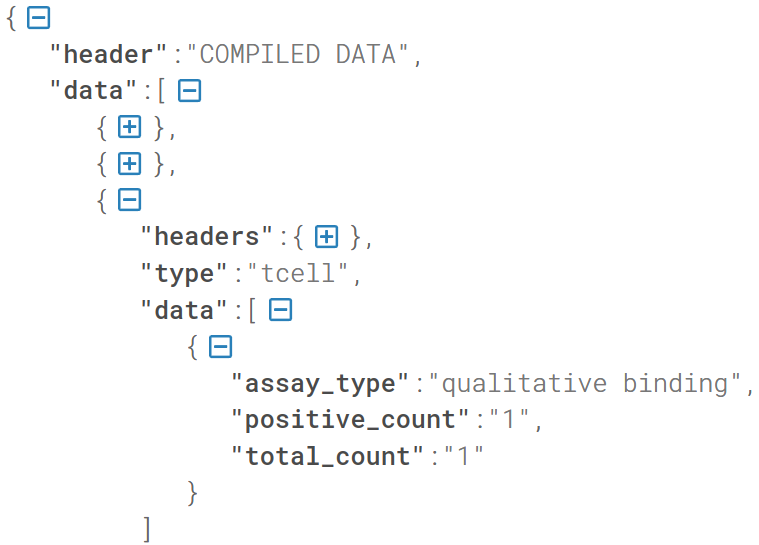

In [33]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 'https://www.iedb.org/epitope/956']
for link in links:
    html = extract_html(url=link)
    
    # Parsing the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    mhc_positives = []
    mhc_negatives = []
    new_t_assay_list = [] # list of tuples (key, value)
    # Dictionary variables
    epitope_dict = {}
    
    for script in scripts:
        if script.string:  # Making sure that the script tag contains a string
            # Use regular expressions to find the JSON-like data
            # epitope_data_match = re.search(r'var resultData = (\[\[.*?\]\]);', script.string)
            compiled_data_match = re.search(r'var compiledData = (.*?});', script.string)
            # refernceEpitopeData # data from organism and antigen
            
            # if epitope_data_match and compiled_data_match:
            if compiled_data_match:
                # Convert the matched string to valid JSON
                # epitope_data_json = json.loads(epitope_data_match.group(1).replace("'", '"'))
                compiled_data_json = json.loads(compiled_data_match.group(1).replace("'", '"'))
                # print(compiled_data_json) # check with https://jsonformatter.curiousconcept.com
                # print(compiled_data_json['data'][0]['data'])
                
                # Part 3: T cell assay data
                ## List of dictionaries
                data_list = compiled_data_json['data']
                # print(data_list)
                # The last element of the list is the dictionary that has the info about the T Cell Assay(s)
                data_dict = data_list[-1]
                # print(data_dict)
                # List of dictionaries
                tcell_assay_list = data_dict['data']
                # In one line: List of dictionaries: each dictionary is about 1 assay
                # print(compiled_data_json['data'][-1]['data'])
                
                for assay_dict in tcell_assay_list:
                    # print(assay_dict)
                    assay_key = assay_dict['assay_type']
                    assay_val = f"{assay_dict['positive_count']}/{assay_dict['total_count']}"
                    # print(assay_key, assay_val)
                    t_assay_tuple = (assay_key, assay_val)
                    new_t_assay_list.append(t_assay_tuple)
                    # epitope_dict[assay_key: assay_val]
                print()
                # break
                
    # print(epitope_dict)
    # print(new_t_assay_list)
    # print([int(assay_val.split("/")[0]) > 0 for assay_key, assay_val in new_t_assay_list])
    t_assay_booleans_list = [int(assay_val.split("/")[0]) > 0 for assay_key, assay_val in new_t_assay_list]
    # If any element in this list is True
    if any(t_assay_booleans_list):
        response_tuple = ("T cell assay(s) response", 1)
        # Add the T assay response tuple as the first element to the new_t_assay_list
        new_t_assay_list.insert(0, response_tuple)
    # print(new_t_assay_list)
    
    for assay_key, assay_val in new_t_assay_list:
        if assay_key not in epitope_dict:
            epitope_dict[assay_key] = assay_val

    pprint(epitope_dict)
    print()


{'T cell assay(s) response': 1, 'qualitative binding': '1/1'}


{'T cell assay(s) response': 1, 'T cell binding': '3/3'}



## P.5.1. Function to get T Cell assay data

In [4]:
# argument to pass to function: the html
def get_T_cell_assay_data(pattern, string):
    # List variables
    t_assays_list = []
    
    # Using regular expressions to find the JSON-like data
    compiled_data_match = re.search(pattern, string)
    
    # If there was no match
    if not compiled_data_match:
        raise ValueError("There was no match for allele and T cell assays data in the HTML")
    # If there was a match, proceed
    compiled_data_json = json.loads((compiled_data_match.group(1)).replace("'", '"'))
    ## List of dictionaries, I only want the last dict, whose 'data' key has the info I want:
    ## another list of dictionaries with the T cell assay data
    assays_list = compiled_data_json['data'][-1]['data']
    for assay_dict in assays_list:
        assay_key = assay_dict['assay_type']
        assay_val = f"{assay_dict['positive_count']}/{assay_dict['total_count']}"
        assay_tuple = (assay_key, assay_val)
        t_assays_list.append(assay_tuple)
        
    # Total response of T cell assays
    ## Generate list of booleans for each assay
    t_assays_boolean_list = [int(val.split("/")[0]) > 0 for key, val in t_assays_list]
    ## Evaluate list of booleans
    if any(t_assays_boolean_list):
        # If even one element of the list is True
        total_T_response = 1
    else:
        # If none is True, all are False
        total_T_response = 0
    return t_assays_list, total_T_response

# P6. Putting everything together

In [5]:
import re
import json
import requests
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
from collections import OrderedDict

def extract_html(url):
    response = requests.get(url)
    return response.text

links = ['https://www.iedb.org/epitope/234', 
        'https://www.iedb.org/epitope/956',
        'https://www.iedb.org/epitope/1005',
        'https://www.iedb.org/epitope/2243313',
        'https://www.iedb.org/epitope/2243365',
        'https://www.iedb.org/epitope/2243367',
        'https://www.iedb.org/epitope/2235314']

# List to store OrderedDicts for each link
ordered_dicts = []

for link in links:
    html = extract_html(url=link)
    
    # To parse the html
    soup = BeautifulSoup(html, 'html.parser')
    scripts = soup.find_all('script', type='text/javascript')
    
    # List variables
    # mhc_positives = []
    # mhc_negatives = []
    
    # Dictionary variables
    epitope_dict = OrderedDict()
    # Flags
    data_extracted = False  # Flag to indicate successful data extraction
    
    for script in scripts:
        # Making sure that the script tag contains a string
        # and also contains the strings with the data I want
        if script.string and "refernceEpitopeData" in script.string and "compiledData" in script.string:
            try:
                # Part 1: Get epitope data (organism, antigen, epitope)
                # epitope_triple_tuple = get_epitope_data(r'var refernceEpitopeData = (.*?});', script.string)
                organism, antigen, epitope = get_epitope_data(r'var refernceEpitopeData = (.*?});', script.string)
                # mhc_double_tuple = get_and_classify_allele_data(r'var compiledData = (.*?});', script.string)
                # Part 2: Get MHC allele data (positive and negative list)
                positive_list, negative_list = get_and_classify_allele_data(r'var compiledData = (.*?});', script.string)
                # Part 3: Get T cell assay data
                t_assays_list, total_T_response = get_T_cell_assay_data(r'var compiledData = (.*?});', script.string)
                # print(t_assays_list)
                data_extracted = True
                print()
                break # out of the loop, data was found, do not keep iterating over other scripts anymore
            except ValueError as e:
                # Handle the ValueError but continue the loop
                print(f"> A ValueError occurred: {e}")
            except Exception as e:
                # Handle the Error but continue the loop
                print(f"> An unexpected error occurred: {e}")
    
    if not data_extracted:
        print(f"No data extracted from the link: {link}")
    
    if data_extracted:
        # Adding Epitope data to dictionary
        epitope_dict["Organism"] = organism
        epitope_dict["Antigen"] = antigen
        epitope_dict["Epitope"] = epitope
        # Adding MHC allele data to dictionary
        epitope_dict["Positive MHC alleles"] = ", ".join(positive_list) if positive_list else "No data found."
        epitope_dict["Negative MHC alleles"] = ", ".join(negative_list) if negative_list else "No data found."
        # Adding T Cell assays data to dictionary
        epitope_dict["Total response T cell assay(s)"] = total_T_response
        assay_entries = {assay_key: assay_val for assay_key, assay_val in t_assays_list if assay_key not in epitope_dict}
        # pprint(assay_entries)
        epitope_dict.update(assay_entries)
        # for assay_key, assay_val in t_assays_list:
        #     if assay_key not in epitope_dict:
        #         epitope_dict[assay_key] = assay_val
        epitope_dict["Source"] = link
        pprint(epitope_dict)
    # Appending dictionary with information from this html to list of dictionaries
    ordered_dicts.append(epitope_dict)
    
# pprint(ordered_dicts)

# Create a DataFrame from the list of OrderedDicts, without the 'Source' column
df = pd.DataFrame(ordered_dicts).drop(columns = 'Source')
df


OrderedDict([('Organism', 'SARS-CoV1'),
             ('Antigen', 'Replicase polyprotein 1ab'),
             ('Epitope', 'AAISDYDYY'),
             ('Positive MHC alleles', 'HLA-A*03:01, HLA-A*11:01, HLA-A*68:01'),
             ('Negative MHC alleles', 'HLA-A*31:01, HLA-A*33:01'),
             ('Total response T cell assay(s)', 1),
             ('qualitative binding', '1/1'),
             ('Source', 'https://www.iedb.org/epitope/234')])

OrderedDict([('Organism', 'SARS-CoV2'),
             ('Antigen', 'Nucleoprotein'),
             ('Epitope', 'AEGSRGGSQA'),
             ('Positive MHC alleles', 'HLA-B*45:01'),
             ('Negative MHC alleles',
              'HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, '
              'HLA-B*44:03'),
             ('Total response T cell assay(s)', 1),
             ('T cell binding', '3/3'),
             ('Source', 'https://www.iedb.org/epitope/956')])

OrderedDict([('Organism', 'SARS-CoV2'),
             ('Antigen', 'Replicase polyprotein 1

,Organism,Antigen,Epitope,Positive MHC alleles,Negative MHC alleles,Total response T cell assay(s),qualitative binding,T cell binding,IFNg release
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01",1,1/1,NaN,NaN
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4...",1,NaN,3/3,NaN
2,SARS-CoV2,Replicase polyprotein 1ab,AEIVDTVSAL,"HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, HLA-B*4...",HLA-B*18:01,0,NaN,NaN,0/2
3,SARS-CoV2.,Spike glycoprotein,QTYVTQQL,No data found.,No data found.,0,NaN,NaN,0/2
4,SARS-CoV2.,Spike glycoprotein,VGYQPYRV,No data found.,No data found.,0,NaN,NaN,0/2
5,SARS-CoV2.,Spike glycoprotein,VLYENQKL,No data found.,No data found.,1,NaN,NaN,2/2
6,SARS-CoV2.,Spike glycoprotein,QLTPTWRVY + PYRE(Q1),"HLA class I, HLA-B*15:01","HLA-A*01:01, HLA-A*02:01, HLA-A*26:01, HLA-B*0...",1,2/4,NaN,NaN


In [6]:
# Then, add the 'Source' column
df['Source'] = [d['Source'] for d in ordered_dicts]
df

,Organism,Antigen,Epitope,Positive MHC alleles,Negative MHC alleles,Total response T cell assay(s),qualitative binding,T cell binding,IFNg release,Source
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01",1,1/1,NaN,NaN,https://www.iedb.org/epitope/234
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4...",1,NaN,3/3,NaN,https://www.iedb.org/epitope/956
2,SARS-CoV2,Replicase polyprotein 1ab,AEIVDTVSAL,"HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, HLA-B*4...",HLA-B*18:01,0,NaN,NaN,0/2,https://www.iedb.org/epitope/1005
3,SARS-CoV2.,Spike glycoprotein,QTYVTQQL,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243313
4,SARS-CoV2.,Spike glycoprotein,VGYQPYRV,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243365
5,SARS-CoV2.,Spike glycoprotein,VLYENQKL,No data found.,No data found.,1,NaN,NaN,2/2,https://www.iedb.org/epitope/2243367
6,SARS-CoV2.,Spike glycoprotein,QLTPTWRVY + PYRE(Q1),"HLA class I, HLA-B*15:01","HLA-A*01:01, HLA-A*02:01, HLA-A*26:01, HLA-B*0...",1,2/4,NaN,NaN,https://www.iedb.org/epitope/2235314


# P.7. Group rows by Antigen

To bring all rows with the same antigen together:

In [10]:
sorted_by_antigen_df = df.sort_values(by = 'Antigen')
sorted_by_antigen_df

,Organism,Antigen,Epitope,Positive MHC alleles,Negative MHC alleles,Total response T cell assay(s),qualitative binding,T cell binding,IFNg release,Source
1,SARS-CoV2,Nucleoprotein,AEGSRGGSQA,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4...",1,NaN,3/3,NaN,https://www.iedb.org/epitope/956
0,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01",1,1/1,NaN,NaN,https://www.iedb.org/epitope/234
2,SARS-CoV2,Replicase polyprotein 1ab,AEIVDTVSAL,"HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, HLA-B*4...",HLA-B*18:01,0,NaN,NaN,0/2,https://www.iedb.org/epitope/1005
3,SARS-CoV2.,Spike glycoprotein,QTYVTQQL,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243313
4,SARS-CoV2.,Spike glycoprotein,VGYQPYRV,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243365
5,SARS-CoV2.,Spike glycoprotein,VLYENQKL,No data found.,No data found.,1,NaN,NaN,2/2,https://www.iedb.org/epitope/2243367
6,SARS-CoV2.,Spike glycoprotein,QLTPTWRVY + PYRE(Q1),"HLA class I, HLA-B*15:01","HLA-A*01:01, HLA-A*02:01, HLA-A*26:01, HLA-B*0...",1,2/4,NaN,NaN,https://www.iedb.org/epitope/2235314


## P.7.1. Reset index

Certainly! After sorting your DataFrame, you can reset the index using the `reset_index()` method. This will replace the current index with a new one where the numbers go from 0 to the length of the DataFrame minus one. You can also drop the old index by setting the `drop` parameter to `True`.

Here's how you can do it:

```python
sorted_by_antigen_df = df.sort_values(by='Antigen').reset_index(drop=True)
```

With `drop=True`, the old index is forgotten. If you omit `drop=True`, the old index will be added as a new column to the DataFrame, which you might not want.

Now, `sorted_by_antigen_df` will have a new sequential index starting from 0.

In [11]:
sorted_by_antigen_df = df.sort_values(by = 'Antigen').reset_index(drop = True)
sorted_by_antigen_df

,Organism,Antigen,Epitope,Positive MHC alleles,Negative MHC alleles,Total response T cell assay(s),qualitative binding,T cell binding,IFNg release,Source
0,SARS-CoV2,Nucleoprotein,AEGSRGGSQA,HLA-B*45:01,"HLA-B*18:01, HLA-B*40:01, HLA-B*40:02, HLA-B*4...",1,NaN,3/3,NaN,https://www.iedb.org/epitope/956
1,SARS-CoV1,Replicase polyprotein 1ab,AAISDYDYY,"HLA-A*03:01, HLA-A*11:01, HLA-A*68:01","HLA-A*31:01, HLA-A*33:01",1,1/1,NaN,NaN,https://www.iedb.org/epitope/234
2,SARS-CoV2,Replicase polyprotein 1ab,AEIVDTVSAL,"HLA-B*40:01, HLA-B*40:02, HLA-B*44:02, HLA-B*4...",HLA-B*18:01,0,NaN,NaN,0/2,https://www.iedb.org/epitope/1005
3,SARS-CoV2.,Spike glycoprotein,QTYVTQQL,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243313
4,SARS-CoV2.,Spike glycoprotein,VGYQPYRV,No data found.,No data found.,0,NaN,NaN,0/2,https://www.iedb.org/epitope/2243365
5,SARS-CoV2.,Spike glycoprotein,VLYENQKL,No data found.,No data found.,1,NaN,NaN,2/2,https://www.iedb.org/epitope/2243367
6,SARS-CoV2.,Spike glycoprotein,QLTPTWRVY + PYRE(Q1),"HLA class I, HLA-B*15:01","HLA-A*01:01, HLA-A*02:01, HLA-A*26:01, HLA-B*0...",1,2/4,NaN,NaN,https://www.iedb.org/epitope/2235314


# P.8. Reading the links

In [14]:
links_list = []
with open(file="../data/last_30_links.txt", mode="r") as fh:
    for line in fh:
        link = line.strip()
        links_list.append(link)

len(links_list)

30

In [20]:
def get_iedb_link_list(file):
    links_list = []
    with open(file, mode="r") as fh:
        for link in fh:
            link = link.strip()
            links_list.append(link)
    return links_list

In [21]:
links = get_iedb_link_list(file="../data/last_30_links.txt")
print(len(links))

30


# P.9. Alive bar

In [1]:
from alive_progress import alive_bar
import time

for x in 1000, 1500, 700, 0:
    with alive_bar(x) as bar:
        for i in range(1000):
            time.sleep(.005)
            bar()

|████████████████████████████████████████| 1000/1000 [100%] in 5.1s (195.30/s) 
|██████████████████████████▋⚠︎            | (!) 1000/1500 [67%] in 5.1s (195.77/s) 
|████████████████████████████████████████✗︎ (!) 1000/700 [143%] in 5.1s (195.14/s) 
|████████████████████████████████████████| 1000 in 5.1s (195.68/s) 


# Px. Links

1. [Python: Parsing tables with Pandas' html function: A guide](https://copyprogramming.com/howto/how-to-parse-table-using-pandas-html-function#how-to-parse-table-using-pandas-html-function)
2. https://justpy.io/tutorial/working_with_html/